In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,RobustScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# A. Data Cleaning & Preprocessing (15 poin)

**Batasan Data untuk Ujian**

- Ukuran data yang digunakan adalah 5000 baris (rows) awal [:5000].

- Variabel yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

# Hotel Booking Cancelation

**Read DataSet as a `DataFrame`**

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')
df = dataset.copy()

In [3]:
display(df.head(2), df.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


(119390, 32)

In [4]:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 
         'meal', 'country', 'market_segment', 'distribution_channel', 
         'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type',
         'required_car_parking_spaces', 'total_of_special_requests']][0:4999]

Mengikuti Instruksi Ujian

In [5]:
display(df.head(3), df.shape)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0


(4999, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        4999 non-null   object 
 1   is_canceled                  4999 non-null   int64  
 2   adults                       4999 non-null   int64  
 3   children                     4999 non-null   float64
 4   babies                       4999 non-null   int64  
 5   meal                         4999 non-null   object 
 6   country                      4997 non-null   object 
 7   market_segment               4999 non-null   object 
 8   distribution_channel         4999 non-null   object 
 9   reserved_room_type           4999 non-null   object 
 10  booking_changes              4999 non-null   int64  
 11  deposit_type                 4999 non-null   object 
 12  days_in_waiting_list         4999 non-null   int64  
 13  customer_type     

In [7]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

Didapatkan 2 values Null Pada country

In [8]:
df[df['country'].isna()]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
30,Resort Hotel,0,1,0.0,0,BB,NaN,Direct,Direct,A,2,No Deposit,0,Transient,0,2
4127,Resort Hotel,1,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


**Cleaning Country Features**

In [23]:
df.shape

(4999, 16)

In [9]:
df['country'].describe()

count     4997
unique      56
top        PRT
freq      3173
Name: country, dtype: object

In [10]:
df['country'].value_counts()

PRT    3173
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
USA      28
POL      28
CHE      26
ITA      23
RUS      23
BRA      18
AUT      12
ROU      12
LUX      10
FIN       9
SWE       8
DNK       6
ARG       6
LVA       6
CHN       5
NOR       5
AUS       4
KOR       3
IND       3
LTU       3
CZE       3
MEX       2
CHL       2
DZA       2
MOZ       2
ZAF       2
OMN       2
SVN       2
MAR       2
CRI       2
TUR       2
EST       2
BLR       1
CYM       1
HUN       1
SRB       1
SMR       1
PRI       1
CPV       1
GRC       1
ISR       1
UKR       1
BWA       1
ALB       1
ZWE       1
AGO       1
ZMB       1
Name: country, dtype: int64

Didapatkan bahwasanya Negara PRT merupakan dengan modulus terbanyak sehingga bisa disimpulkan dengan metoda statistik Central Tendency, `Null` values pada kolom tersebut diisi dengan methode modus.

In [11]:
df['country'] = df['country'].fillna('PRT')
df['country'].isnull().sum()

0

# B. EDA (25 poin)

Jalankan Exploratory Data Analysis untuk:

Memahami profil tamu/konsumen hotel (customer profiling).
Memahami kebiasaan tamu/konsumen hotel (customer behavior).
Berikan penjelasan tentang insight yang Anda temukan dari hasil Exploratory Data Analysis ke manajemen hotel!

In [12]:
df.head(2)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0


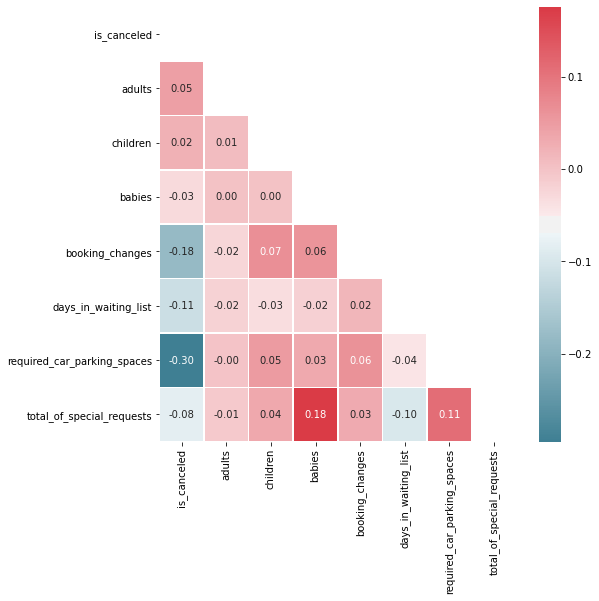

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# Jumlah Canceled and Not Canceled

In [14]:
cancel_df = df[df['is_canceled'] == 1]
cancel_no_df = df[df['is_canceled'] == 0]

In [15]:
cancel = df['is_canceled'].value_counts()[1]
no_cancel = df['is_canceled'].value_counts()[0]

print(f'TOTAL CANCEL : {cancel} |', f'TOTAL NO CANCEL : {no_cancel}')

TOTAL CANCEL : 2297 | TOTAL NO CANCEL : 2702


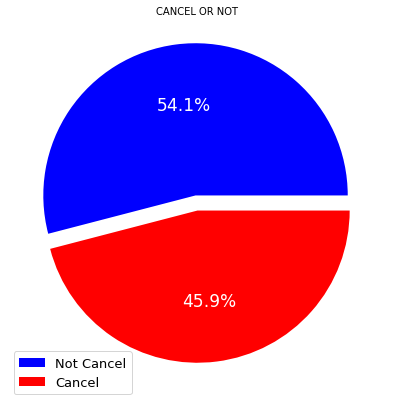

In [16]:
plt.figure(figsize = (8,7))
plt.title('CANCEL OR NOT', fontsize = 10)

labels = 'Not Cancel', 'Cancel'

plt.pie(df['is_canceled'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0), colors='bright')

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

Pie chart diatas bahwa dari total 5000 pesanan, ada 45.9% atau berjumlah 2297 user yang cancel booking sehingga menyisakan 54.1% atau 2702 user booking yang tidak di cancel.

In [17]:
correlation = df.corr()["is_canceled"]
correlation.abs().sort_values(ascending=False)[1:]

required_car_parking_spaces    0.295285
booking_changes                0.181558
days_in_waiting_list           0.113411
total_of_special_requests      0.082928
adults                         0.045201
babies                         0.029520
children                       0.024737
Name: is_canceled, dtype: float64

Berdasarkan Korelasi diatas dapat disinyalir bahwa korelasi tertinggi pada `required_car_parking_spaces`. Sehingga dipastikan bahwasanya kondisi cancel berkorelasi erat dengan adanya tempat parkir.

In [18]:
df['required_car_parking_spaces']

0       0
1       0
2       0
3       0
4       0
       ..
4994    0
4995    0
4996    0
4997    0
4998    0
Name: required_car_parking_spaces, Length: 4999, dtype: int64

## Required Parking Space

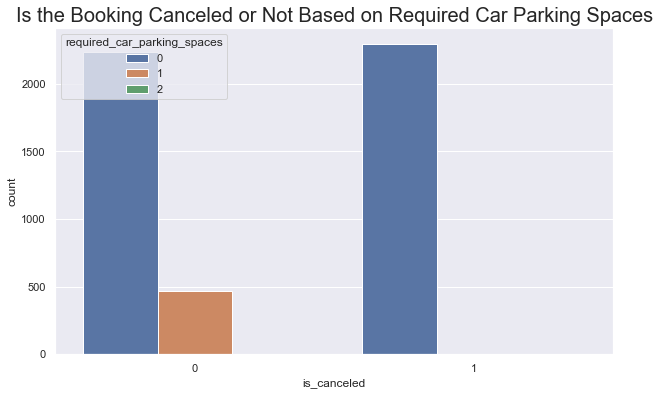

In [19]:
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")
plt.title("Is the Booking Canceled or Not Based on Required Car Parking Spaces", fontdict = {'fontsize': 20})
axis = sns.countplot(x = "is_canceled", hue = 'required_car_parking_spaces', data = df)

0 Merupakan No Cancel

1 Merupakan Cancel

Sehingga dapat dilihat bahwasanya jumlah yang tidak di cancel dengan adanya parking space berjumlah lebih banyak.

## Country

In [20]:
cancel_df['country'].value_counts().head(10)

PRT    2189
ESP      44
GBR      38
CN       13
IRL       5
DEU       3
ITA       3
FRA       2
Name: country, dtype: int64

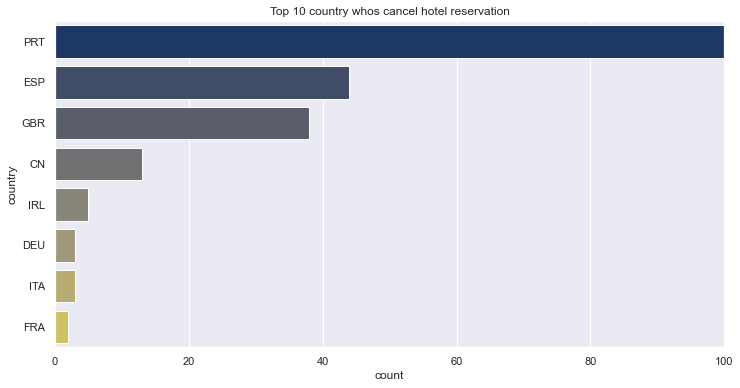

In [27]:
country_cancel_10 = pd.DataFrame(cancel_df['country'].value_counts().head(10))
plt.figure(figsize=(12,6))
sns.countplot(data=cancel_df, y='country', order=country_cancel_10.index, palette="cividis")
plt.xlim([0,100])
plt.title('Top 10 country whos cancel hotel reservation')
plt.show()

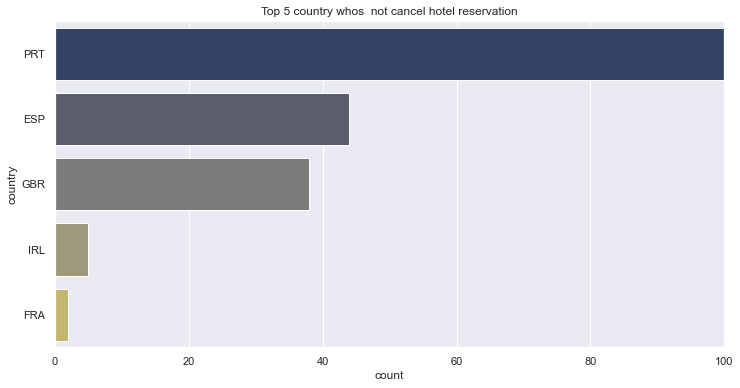

In [31]:
country_no_cancel_10 = pd.DataFrame(cancel_no_df['country'].value_counts().head(5))
plt.figure(figsize=(12,6))
sns.countplot(data=cancel_df, y='country', order=country_no_cancel_10.index, palette="cividis")
plt.title('Top 5 country whos  not cancel hotel reservation')
plt.xlim([0,100])
plt.show()

Dilihat dari kedua diagram tersebut dapat disimpulkan bahwasanya dataset tidak balance. Portugal merupakan dengan negara terbanyak dalam meng cancel ataupun tidak meng cancel.

Diikuti dengan ESP, GBR, IRL, FRA dalam tidak meng cancel

Dan dalam mengcancel urutan ke 4 diisi dengan negara CN.

## Distribution Channel

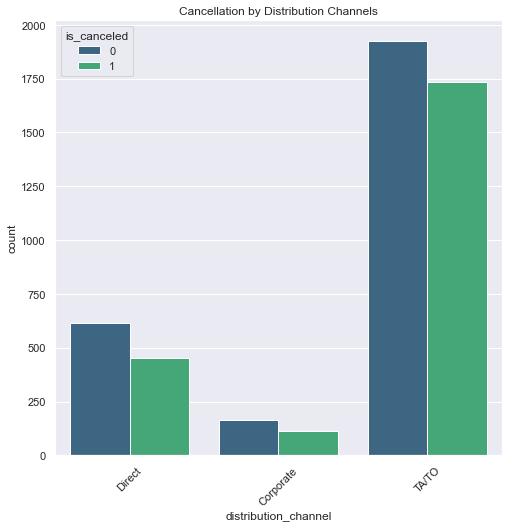

In [37]:
plt.figure(figsize=(8,8))
plt.title(label='Cancellation by Distribution Channels')
plt.xticks(rotation=45) 
sns.countplot(x='distribution_channel',hue='is_canceled',data=df, palette='viridis')
plt.show()


Dengan agency TA/TO Canceled booking / No Canceled booking terlihat lebih banyak ketimbang melalui Corportate ataupun Direct. Artinya dengan Agency TA/TO harus dilihat kembali faktor apa saja yang mempengaruhi.

## Deposit Type

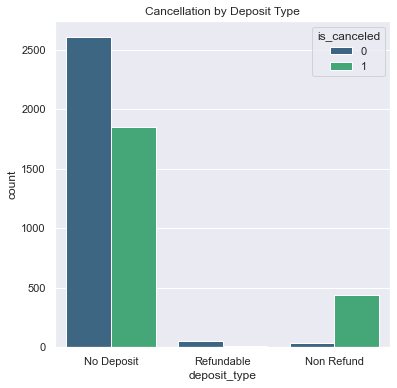

In [39]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Deposit Type')
sns.countplot(x='deposit_type',hue='is_canceled',data=df, palette='viridis')
plt.show()

Dapat dilihat dari barplot tersebut Non-Refund dengan tidak mengcancel jumlahnya. Tetapi Cancel terbanyak dilihat dari Tidak adanya deposit (No Deposit).

Kebanyakan reservasi tidak menggunakan deposit. Disini anehnya justru deposit yang Non-Refundable memiliki persentase yang lebih banyak di-cancel ketimbang tidak memiliki deposit.

## Adults

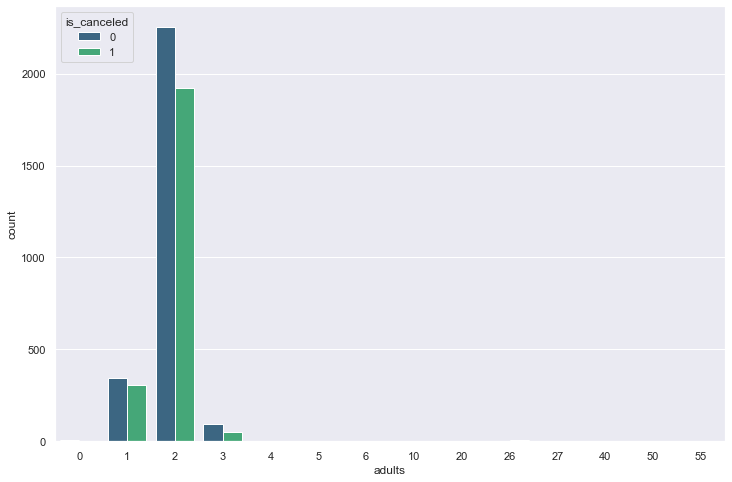

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x='adults', data=df, hue='is_canceled', palette='viridis');

Reservarsi Hotel dilakukan oleh 2 orang dewasa dan 1 orang dewasa. Dan mengcancel dilakukan oleh 2 orang dewasa yang paling banyak.

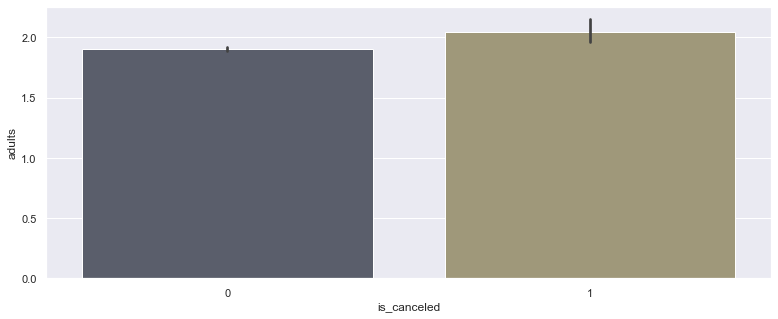

In [51]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'is_canceled', y = 'adults', data = df, palette='cividis');

## Children

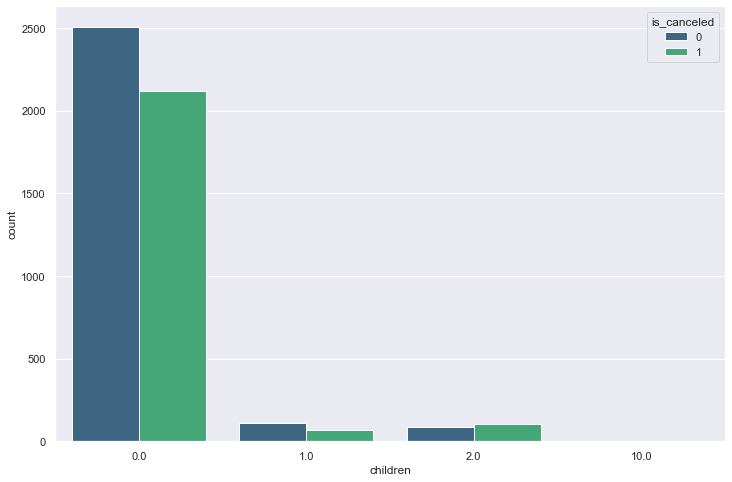

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x='children', data=df, hue='is_canceled', palette='viridis');

Nilai 0 pada Children artinya tidak membawa anak sama sekali anak-anak.

## Babies

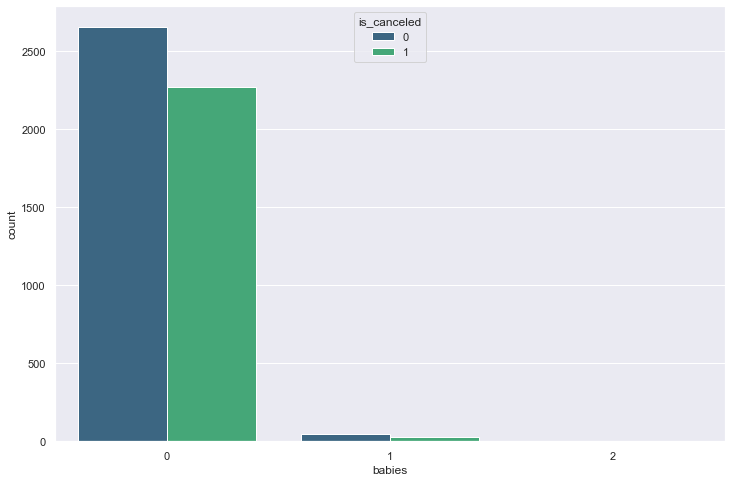

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x='babies', data=df, hue='is_canceled', palette='viridis');

Reservasi hotel dilakukan paling banyak dengan customer yang tidak membawa bayi/*babies*.

## Meal

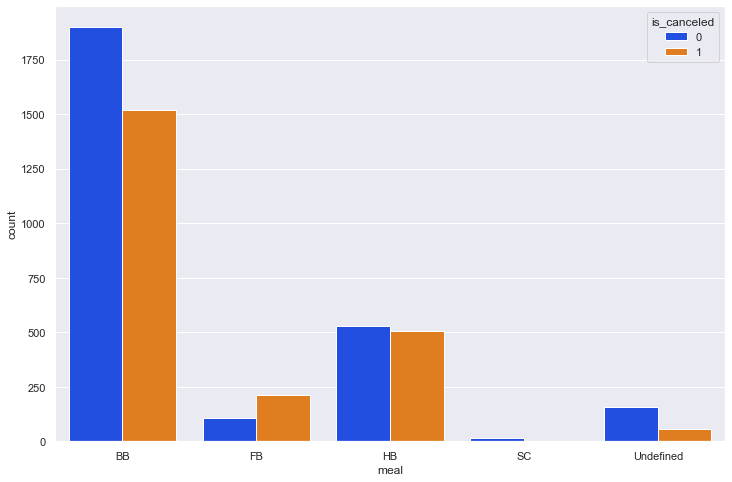

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x='meal', data=df, hue='is_canceled', palette='bright');

Tipe paling banyak cancel dan tidak cancel pada tipe makanan BB.

## Another Features

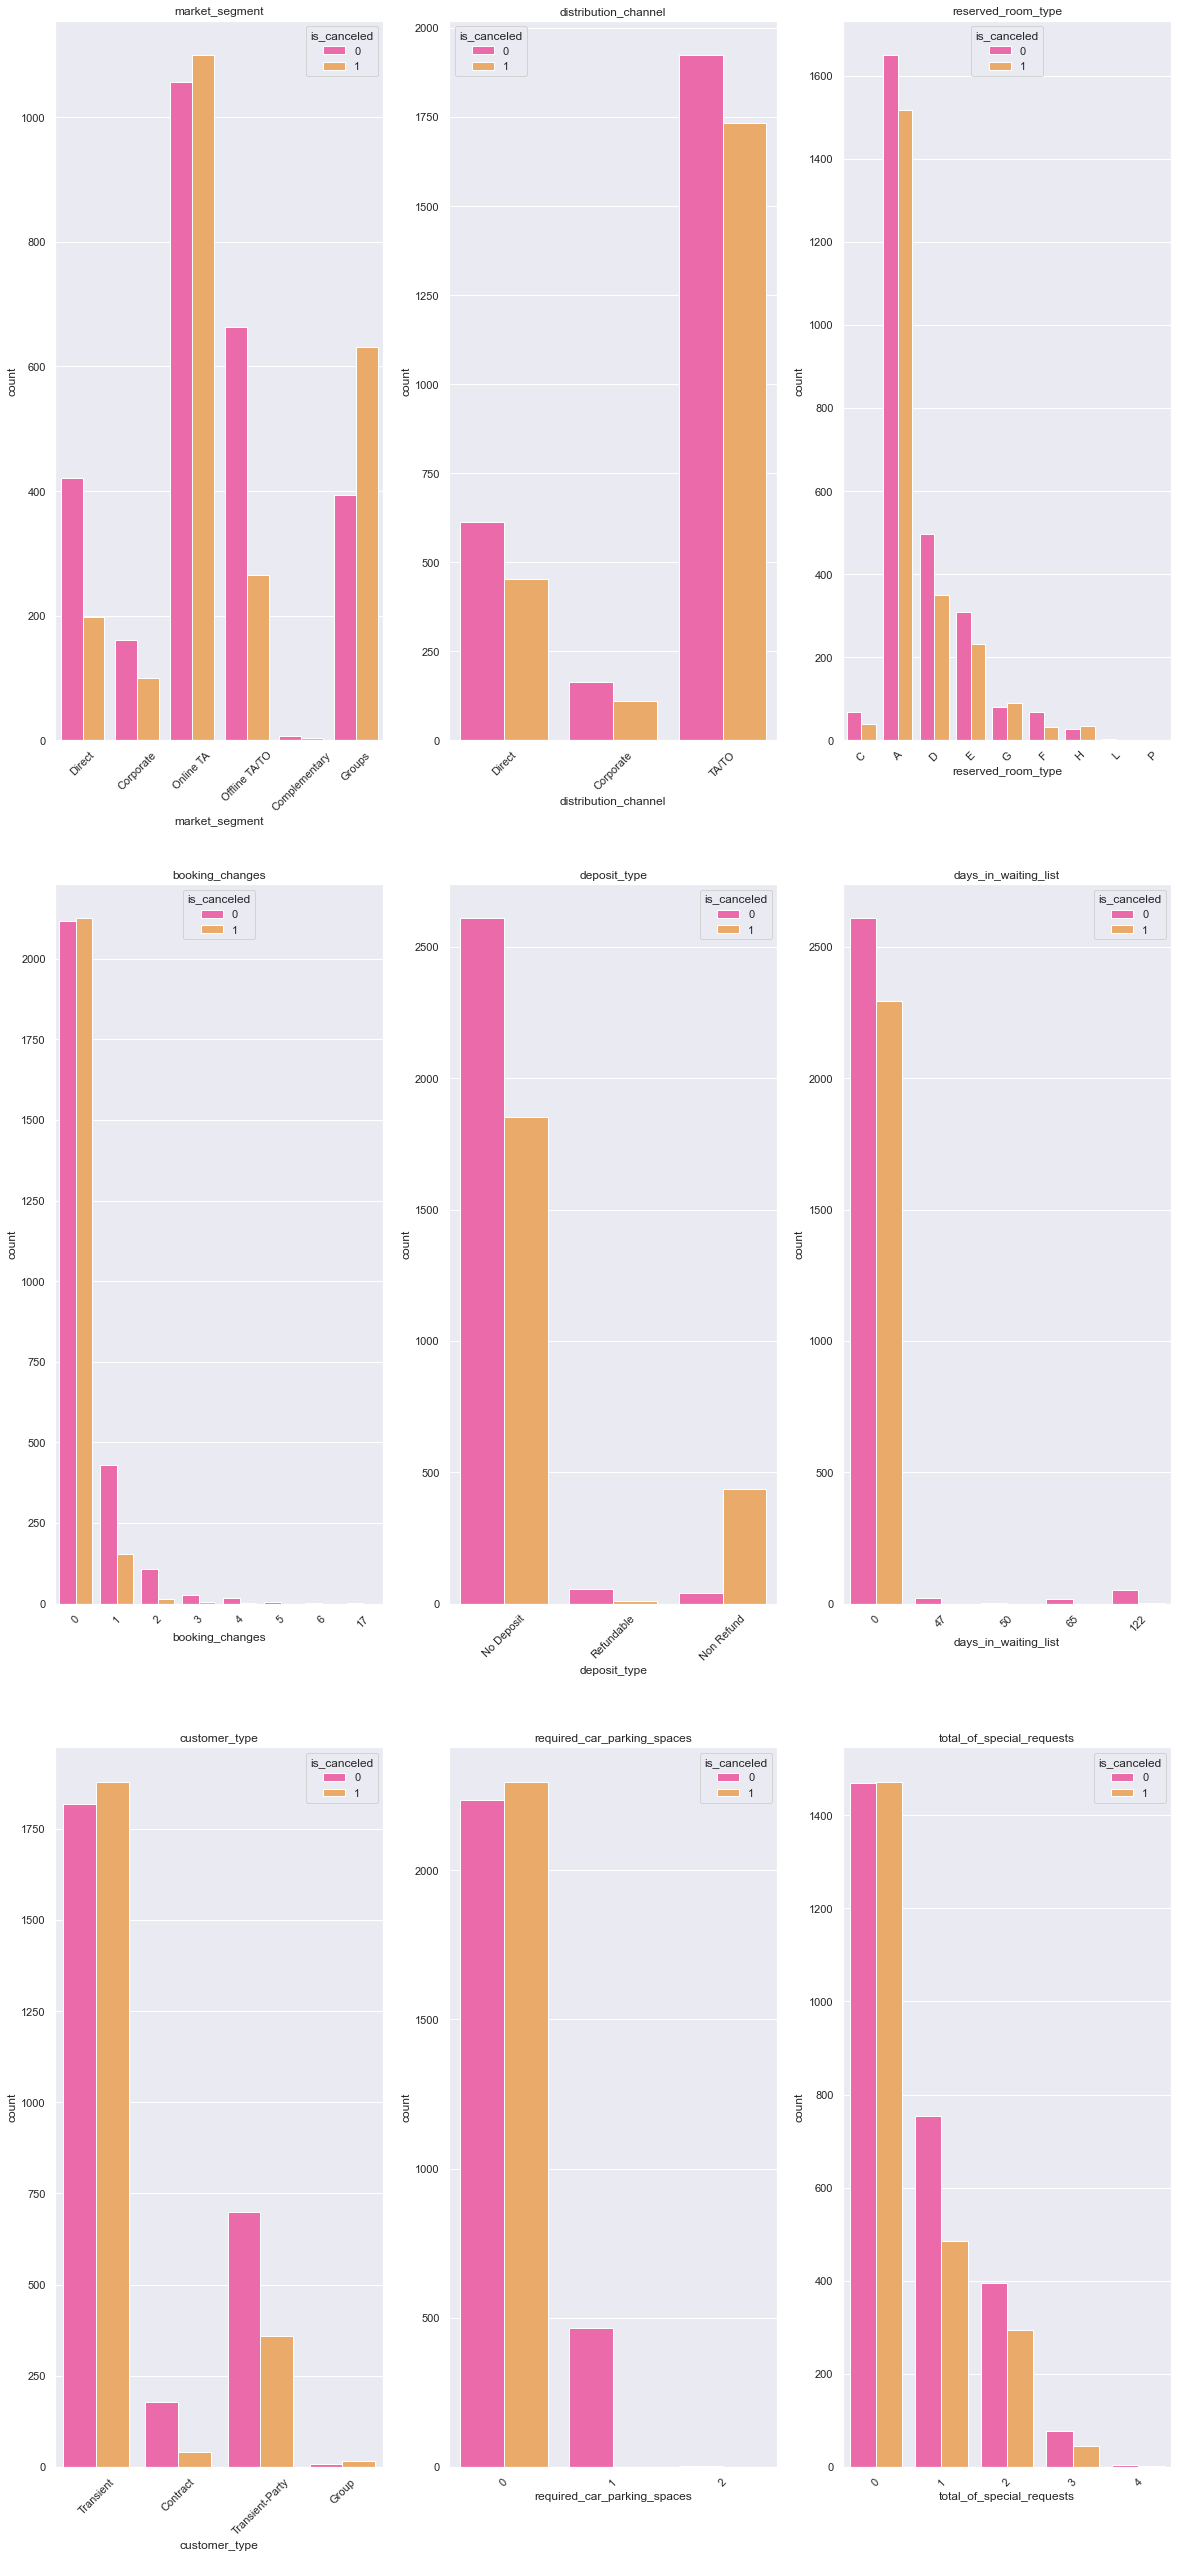

In [55]:
n = 1
plt.figure(figsize=(20,45))
for i in ['market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 
          'required_car_parking_spaces', 'total_of_special_requests']:
    plt.subplot(3, 3, n)
    sns.countplot(x=i, data=df, hue='is_canceled', palette='spring')
    plt.title(i)
    plt.xticks(rotation=45)
    n+=1
    
plt.show()

### Konklusi

- Hampir semua reservasi menggunakan `distribution channel` melalui Travel Agent dan Tour Operators

- Kebanyakan reservasi memilih tipe room A kemudian diikuti D, dan E

- Hampir semua reservasi tidak mengalami perubahan (0), kemudian diikuti dengan 1x perubahaan dan seterusnya. Reservasi yang tidak mengalami perubahan justru memiliki persentase cancel yang lebih besar ketimbang dilakukan perubahaan reservasi

- Hampir seluruh tipe customer type  yang booking hotel Transient (when the booking is not part of a group or contract, and is not associated to other transient booking). Persentasi cancel yang paling besar berasal dari tipe ini dan Group (Berkelompok)


# C. Model Building & Hyper-parameter Tuning (30 poin)

- Lakukan training minimal 3 model ML yang Anda pahami, untuk mendapatkan model ML terbaik untuk memprediksi apakah user akan cancel booking atau tidak! Jelaskan secara singkat cara kerja model ML yang Anda gunakan!

- Tingkatkan performa model ML mengikuti instruksi model evaluation (ikuti instruksi soal D). Beri penjelasan langkah-langkah Anda untuk meningkatkan performa model ML!

In [7]:
df1 = df.copy()

Check *features* yang tersedia

In [8]:
display(df1.columns, df1.head(3))

Index(['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0


In [31]:
df1.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
deposit_type_encode            0
customer_type_encode           0
distribution_channel_encode    0
meal_encode                    0
market_segment_encode          0
reserved_room_type_encode      0
dtype: int64

**Drop Outlier**

In [32]:
df1.dropna(inplace=True)

**Checking Unique and Describe**

In [14]:
df1.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
is_canceled,4999.0,0.459492,0.498406,0.0,0.0,0.0,1.0,1.0
adults,4999.0,1.969794,1.566483,0.0,2.0,2.0,2.0,55.0
children,4999.0,0.115623,0.444874,0.0,0.0,0.0,0.0,10.0
babies,4999.0,0.014803,0.122421,0.0,0.0,0.0,0.0,2.0
booking_changes,4999.0,0.207241,0.612544,0.0,0.0,0.0,0.0,17.0
days_in_waiting_list,4999.0,1.772354,13.546689,0.0,0.0,0.0,0.0,122.0
required_car_parking_spaces,4999.0,0.093819,0.292975,0.0,0.0,0.0,0.0,2.0
total_of_special_requests,4999.0,0.602120,0.823283,0.0,0.0,0.0,1.0,4.0


In [15]:
df1.describe(include='object').T

,count,unique,top,freq
hotel,4999,1,Resort Hotel,4999
meal,4999,5,BB,3418
country,4997,56,PRT,3173
market_segment,4999,6,Online TA,2156
distribution_channel,4999,3,TA/TO,3657
reserved_room_type,4999,9,A,3167
deposit_type,4999,3,No Deposit,4461
customer_type,4999,4,Transient,3698


In [43]:
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
df1['deposit_type_encode']=labelencoder.fit_transform(df1['deposit_type'])
df1['customer_type_encode']=labelencoder.fit_transform(df1['customer_type'])
df1['distribution_channel_encode']=labelencoder.fit_transform(df1['distribution_channel'])
df1['meal_encode']=labelencoder.fit_transform(df1['meal'])
df1['market_segment_encode']=labelencoder.fit_transform(df1['market_segment'])
df1['reserved_room_type_encode']=labelencoder.fit_transform(df1['reserved_room_type'])
df1['country_encode'] = labelencoder.fit_transform(df1['country'])
# df1['country_encode']=labelencoder.fit_transform(df1['country'])

## Checking Correlation

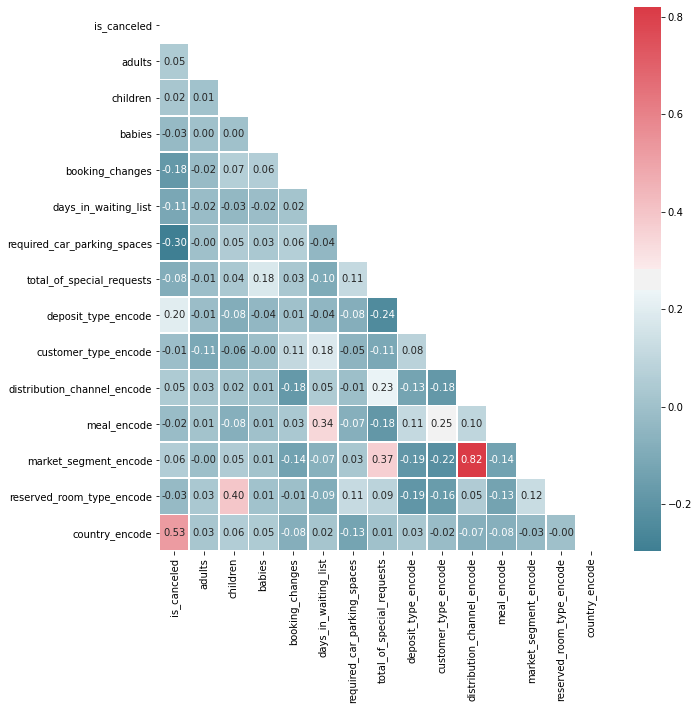

In [45]:
corr = df1.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [46]:
correlation = df1.corr()["is_canceled"]
correlation.sort_values(ascending=False)[1:]

country_encode                 0.525279
deposit_type_encode            0.197125
market_segment_encode          0.058982
distribution_channel_encode    0.047274
adults                         0.045378
children                       0.024751
customer_type_encode          -0.009754
meal_encode                   -0.020150
reserved_room_type_encode     -0.026795
babies                        -0.029523
total_of_special_requests     -0.082501
days_in_waiting_list          -0.113431
booking_changes               -0.181139
required_car_parking_spaces   -0.295340
Name: is_canceled, dtype: float64

Dari heatmap dan correlation diatas didapatkan bahwasanya yang berkorelasi secara linear ataupun terbalik terhadap *feature* `is_canceled`.

Pemilihan *features* adalah:

- `country_encode`
- `deposit_type_encode`
- `market_segment_encode`
- `distribution_channel_encode`
- `adults`
- `required_car_parking_spaces`
- `booking_changes`
- `days_in_waiting_list`


## Splitting the DataSet

In [47]:
x = df1[['country_encode','deposit_type_encode','market_segment_encode','distribution_channel_encode',
         'adults','required_car_parking_spaces',
        'booking_changes','days_in_waiting_list']]
y = df1[['is_canceled']]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [49]:
x_train = RobustScaler().fit_transform(x_train)
x_test = RobustScaler().fit_transform(x_test)

## Fitting Model

### Before Tunning

**Model Sebelum Hyperparameter Tuning**

model_LR : LogisticRegression
model_RF : RandomForestClassifier
model_RF : DecisionTreeClassifier

In [50]:
model_LR = LogisticRegression()
model_RF = RandomForestClassifier()
model_DT = DecisionTreeClassifier()
model_LR.fit(x_train, y_train)
model_RF.fit(x_train, y_train)
model_DT.fit(x_train, y_train)

# print(model_LR.coef_)
# print(model_LR.intercept_)

# m = model_LR_ori.coef_[0][0]
# c = model_LR_ori.intercept_[0]

DecisionTreeClassifier()

In [51]:
# prediksi
y_pred_LR = model_LR.predict(x_test)
y_pred_RF = model_RF.predict(x_test) 
y_pred_DT = model_DT.predict(x_test) 

## Performance Model

In [52]:
print('Logistic Regression Model :',model_LR.score(x_train, y_train))
print('Logistic Random Forest Model :',model_RF.score(x_train, y_train))
print('Logistic Decision Tree Model :',model_DT.score(x_train, y_train))

Logistic Regression Model : 0.8108581436077058
Logistic Random Forest Model : 0.8696522391793845
Logistic Decision Tree Model : 0.8696522391793845


### Logistic Regression

In [53]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       546
           1       0.75      0.90      0.82       454

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000



### Random Forest Classifier

In [54]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       546
           1       0.79      0.95      0.86       454

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.88      0.86      0.86      1000



### Decision Tree Classifier

In [55]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       546
           1       0.80      0.94      0.86       454

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.87      0.86      0.86      1000



Dapat dilihat 

## Evaluation Before Tunning

### Logistic Regression

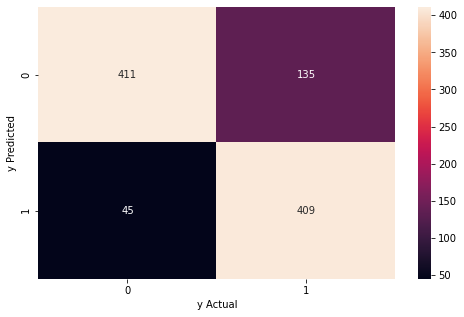

In [77]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

In [94]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LR).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

TN = 411 FP = 135 FN = 45 TP = 409


### Random Forest Classifier

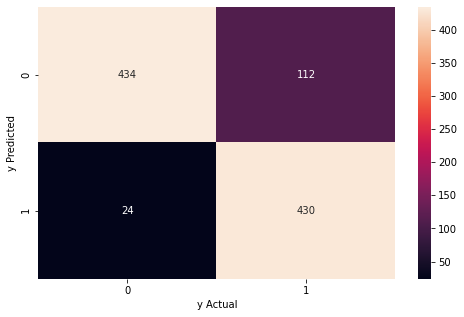

In [78]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

In [95]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

TN = 434 FP = 112 FN = 24 TP = 430


### Decision Tree Classifier

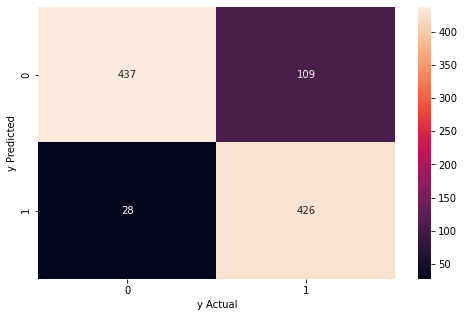

In [79]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

In [96]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

TN = 437 FP = 109 FN = 28 TP = 426


##  Hyperparameter Tunning

**Parameter pada model**

In [60]:
# DecisionTree Parameter
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth=[10,20,30,40,50,60,70,80,90,100]
min_samples_split= [2, 5, 10]
min_samples_leaf= [1, 2, 4]

param_DT = {'criterion' : criterion, 'splitter' : splitter, 'max_depth':max_depth,'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}

In [62]:
# LogisticRegression Parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param_LR = {'penalty':penalty, 'solver':solver, 'max_iter':max_iter}

In [61]:
# RandomForest Parameter
max_depth=[10,20,30,40,50,60,70,80,90,100]
min_samples_leaf= [1, 2, 4]
min_samples_split= [2, 5, 10]
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

param_RF = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split,'n_estimators':n_estimators}

### Randomized Search CV

#### Logistic Regression

In [63]:
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param_LR, cv = 5)

In [64]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 1000}

#### Random Forest Classifier

In [65]:
model_RF_RS = RandomizedSearchCV(
    model_RF, param_RF, cv = 10)

In [66]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 30}

#### Decision Tree Classifier

In [67]:
model_DT_RS = RandomizedSearchCV(
    model_DT, param_DT, cv = 5)

In [68]:
model_DT_RS.fit(x_train, y_train)
model_DT_RS.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'gini'}

## Tunning

In [71]:
model_LR_tun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter = 1000)
model_RF_tun = RandomForestClassifier(n_estimators= 600, min_samples_split= 5, min_samples_leaf= 2, max_depth= 30)
model_DT_tun = DecisionTreeClassifier(splitter='best', min_samples_split= 2, min_samples_leaf= 2, max_depth= 20, criterion= 'gini')
model_LR_tun.fit(x_train, y_train)
model_RF_tun.fit(x_train, y_train)
model_DT_tun.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2)

In [72]:
# prediksi
y_pred_LR_tun = model_LR_tun.predict(x_test)
y_pred_RF_tun = model_RF_tun.predict(x_test) 
y_pred_DT_tun = model_DT_tun.predict(x_test) 

### Performance Model

In [ ]:
print('Logistic Regression Model Tunning :',model_LR_tun.score(x_train, y_train))
print('Logistic Random Forest Model Tunning :',model_RF_tun.score(x_train, y_train))
print('Logistic Decision Tree Model Tunning :',model_DT_tun.score(x_train, y_train))

#### Logistic Regression

In [53]:
print(classification_report(y_test, y_pred_LR_tun))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       546
           1       0.75      0.90      0.82       454

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000



#### Random Forest Classifier

In [54]:
print(classification_report(y_test, y_pred_RF_tun))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       546
           1       0.79      0.95      0.86       454

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.88      0.86      0.86      1000



#### Decision Tree Classifier

In [55]:
print(classification_report(y_test, y_pred_DT_tun))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       546
           1       0.80      0.94      0.86       454

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.87      0.86      0.86      1000



### Evaluation After Tunning

- Cancel 1 (Positive)
- No Cancel 0 (Negative)

#### Logistic Regression

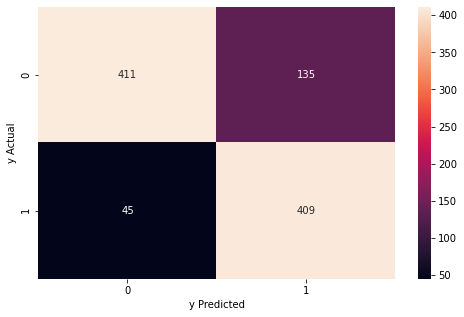

In [80]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_LR_tun), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

In [97]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LR_tun).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

TN = 411 FP = 135 FN = 45 TP = 409


#### Random Forest Classifier

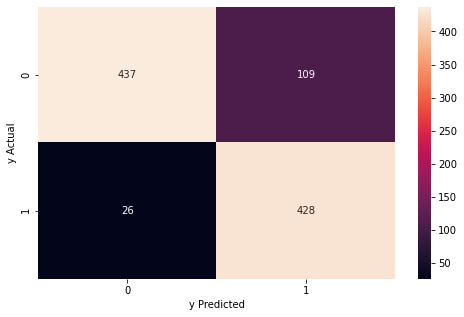

In [81]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF_tun), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

In [98]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF_tun).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

TN = 437 FP = 109 FN = 26 TP = 428


#### Decision Tree Classifier

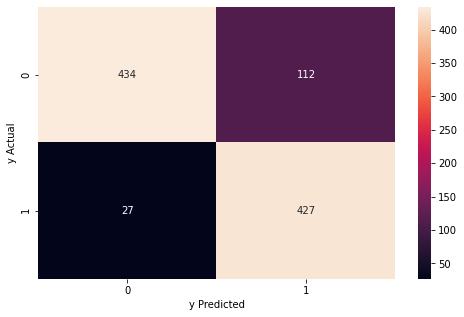

In [83]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DT_tun), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

In [99]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT_tun).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

TN = 434 FP = 112 FN = 27 TP = 427


# D. Model Evaluation (30 poin)

Ada 2 jenis kesalahan yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:

Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan.
Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).

## Kesimpulan Evaluation Model: Before and After Tunning

**1. Before Tunning**

- Cancel = 1 (Positive)
- No Cancel =  0 (Negative)

- Logistic Regression

        F1 Score : 0.82
        TN = 411 FP = 135 FN = 45 TP = 409

- RandomForest Classifier

        F1 Score : 0.86
        TN = 434 FP = 112 FN = 24 TP = 430

- Decision Tree Classifier

        F1 Score : 0.86
        TN = 437 FP = 109 FN = 28 TP = 426

**2. After Tunning Tunning**

- Logistic Regression

        F1 Score : 0.86
        TN = 411 FP = 135 FN = 45 TP = 409

- RandomForest Classifier

        F1 Score : 0.86
        TN = 437 FP = 109 FN = 26 TP = 428

- Decision Tree Classifier

        F1 Score : 0.86
        TN = 434 FP = 112 FN = 27 TP = 427
        
<br>


**************


**<span style='color:Indianred'>Model yang dipakai untuk mendekati prediksi secara akurat Before maupun After Tunning Adalah `RandomForestClassifier` ataupun `DecisionTree Classifier` dapat dilihat dari nilai pada f1 Score 0.86. Jika `f1 score` mendekati 1 maka Nilai `Recall` ataupun `Precision` mendekati kondisi sempurna/*perfect* dalam memprediksi.</span>**



- Evaluasi Keseluruhan terhadap dampak bisnis

1. Ketika diprediksi No Cancel ( Negative ) dan aktual Cancel (Positive) dalam booking case. Prediksi 0 dan aktual nya 1. Dapat dilihat jumlah `TN`,`FP`,`FN`,`TP` yang tertera pada evaluation model.

        - Example dari After Tunning Decision Tree Classifier
    
    - TN (True Negative) : Aktual dan Prediksi No Cancel (0) berjumlah 434.
    
    - FN (False Negative) : Aktualnya Cancel (1) dan Prediksi No Cancel (0) berjumlah 27
    
            Artinya jumlah 27 kondisi yang sudah meng-cancel, diprediksi tidak meng-cancel maka ini akan merugikan untuk revenue perusaahan

    - FP (False Positive) : Aktual No Cancel dan Prediksi Cancel  berjumlah 112.
    
    - TP (True Positive) : Aktualnya Cancel dan Prediksi Cancel berjumlah 427.
    
            Artinya jumlah 112 yang diprediksi cancel akan mengakibatkan kerugian untuk revenue perusahaan
            
*******

Langkah yang baik untuk meningkatkan performa model adalah meningkatkan nilai: 

- a. Precision Negative Score atau 

- b. Recall Positive Score.

Dengan meningkatkan nilai (a.) Sehingga jumlah user yg diprediksi no cancel booking dan actual cancel akan menurun

Dengan meningkatkan nilai (b.) Sehingga jumlah user aktual user no cancel akan semakin presisi, semakin tahu kondisi aktualnya.
